# Boston Dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


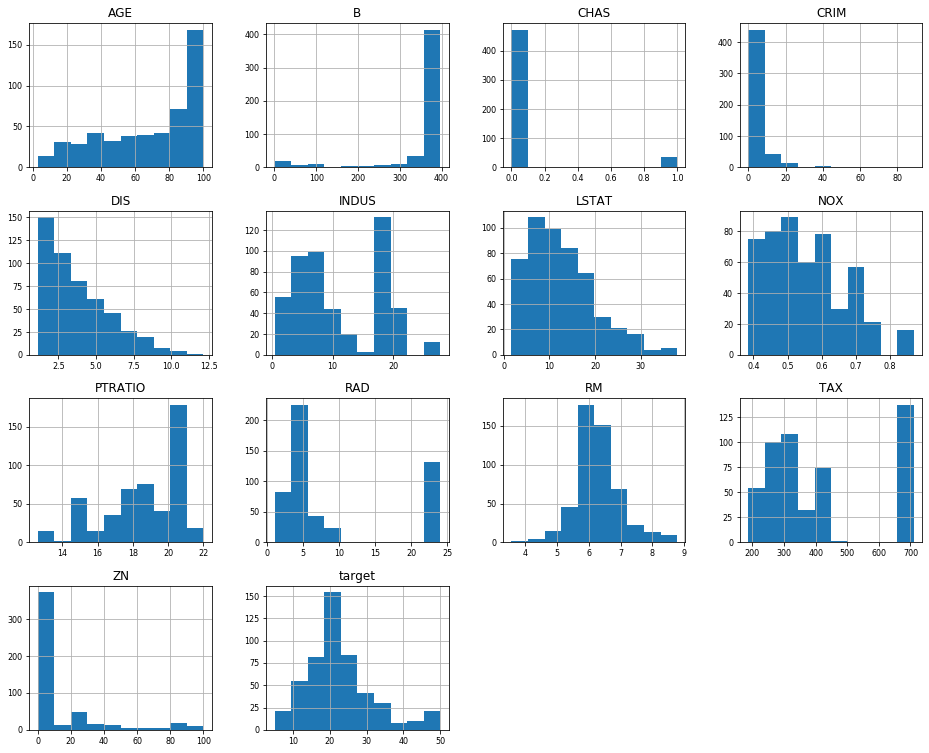

In [19]:
df.hist(figsize=(16,13),bins = 10, xlabelsize = 8, ylabelsize = 8);

In [25]:
df["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

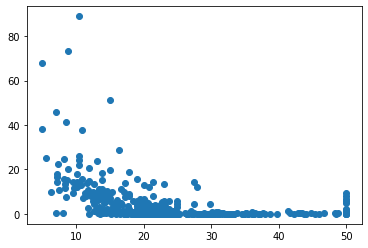

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df["target"],df["CRIM"])

In [20]:
cor = df.corr()["target"][:-1]
cor.sort_values(ascending=True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Name: target, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[boston.feature_names], df['target'], test_size=0.3,random_state = 42)

In [7]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train, Y_train);

In [8]:
pred = clf.predict(X_test)

In [9]:
print("labels:\t\t",list(Y_test[:5]))
print("prediction:\t",pred[:5])

labels:		 [23.6, 32.4, 13.6, 22.8, 16.1]
prediction:	 [23.9 33.1 13.3 24.7 19.4]


In [10]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error(Y_test,pred)

print("The Root_Mean_Squared_Error is",tree_mae)

The Root_Mean_Squared_Error is 2.4460526315789473


## Using KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, Y_train);

In [12]:
pred = knn.predict(X_test)

In [13]:
print("labels:\t\t",list(Y_test[:5]))
print("prediction:\t",pred[:5])

labels:		 [23.6, 32.4, 13.6, 22.8, 16.1]
prediction:	 [24.54 29.34 14.6  28.96 17.44]


In [14]:
knn_mae = mean_absolute_error(Y_test,pred)

print("The Root_Mean_Squared_Error is",knn_mae)

The Root_Mean_Squared_Error is 4.026315789473684


## Using Random Forest.

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, Y_train);

In [16]:
pred = forest.predict(X_test)

In [17]:
print("labels:\t\t",list(Y_test[:5]))
print("prediction:\t",pred[:5])

labels:		 [23.6, 32.4, 13.6, 22.8, 16.1]
prediction:	 [22.966 32.381 16.97  23.987 16.951]


In [18]:
forest_mae = mean_absolute_error(Y_test,pred)

print("The Root_Mean_Squared_Error is",forest_mae)

The Root_Mean_Squared_Error is 2.0996052631578954


<hr>

In [28]:
from sklearn.model_selection import cross_val_score

In [52]:
forest_scores = cross_val_score(forest, X_train, Y_train, scoring="neg_mean_absolute_error", cv=10)

In [51]:
import numpy as np

np.mean(-forest_scores)

2.4507718954248365

In [34]:
from sklearn.metrics import *

In [37]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc